In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1.导入数据

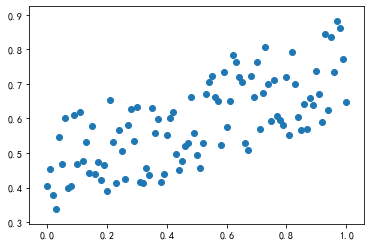

In [2]:
points = np.genfromtxt("data/lr_data.txt",delimiter="\t")
#points
#提取points中的两列数据，分别作为x,y
x=points[:,0];
y=points[:,1];

#用plt画出散点图
plt.scatter(x,y)
plt.show()

## 2.定义损失函数

In [3]:
# 损失函数是系数的函数，另外还要传入数据的x,y
def compute_cost(w,b,points):
    total_cost=0
    M =len(points)
    for i in range(M):
        x=points[i,0]
        y=points[i,1]
        total_cost += (y-w*x-b)**2
    return total_cost/M #一除都是浮点 两个除号是地板除，整型。 如 3 // 4

## 3.定义模型的超参数

In [4]:
alpha = 0.02
initial_w = 1
initial_b = 0
num_iter =2000

## 4.定义核心梯度下降算法函数

In [5]:
def grad_desc(points,initial_w,initial_b,alpha,num_iter):
    w = initial_w
    b = initial_b
    # 定义一个list保存所有的损失函数值，用来显示下降过程。
    cost_list=[]
    for i in range(num_iter):
        cost_list.append(compute_cost(w,b,points))
        w,b= step_grad_desc(w,b,alpha,points)
    return [w,b,cost_list]

def step_grad_desc(current_w,current_b,alpha,points):
    sum_grad_w=0
    sum_grad_b=0
    M=len(points)
    #对每个点代入公式求和
    for i in range(M):
        x= points[i,0]
        y= points[i,1]
        sum_grad_w += (current_w * x +current_b -y) *x
        sum_grad_b +=  current_w * x +current_b -y
    #用公式求当前梯度
    grad_w=2/M * sum_grad_w
    grad_b=2/M * sum_grad_b
    
    #梯度下降，更新当前的w和b
    updated_w = current_w- alpha * grad_w
    updated_b = current_b -alpha * grad_b
    return updated_w,updated_b

## 5.测试，运行梯度下降算法

w is : 0.2981619373045971
b is : 0.43727598190867334
cost is: 0.007668299726891766


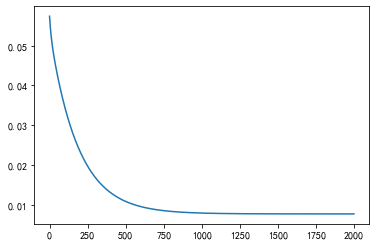

In [6]:
w,b,cost_list= grad_desc(points,initial_w,initial_b,alpha,num_iter)
print ("w is :",w)
print ("b is :",b)

cost = compute_cost(w,b,points)

#print("cost_list:",cost_list)
print("cost is:",cost)
plt.plot(cost_list)

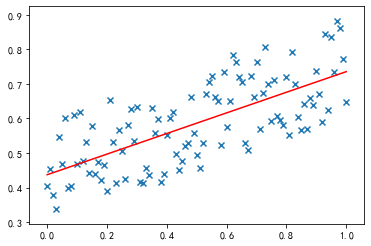

In [38]:
plt.scatter(x,y,marker="x")

pred_y= w*x+b

plt.plot(x,pred_y,c='r')

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x.reshape(-1,1),y)
lin_reg.intercept_,lin_reg.coef_

y_hat=lin_reg.predict(x.reshape(-1,1))
y_hat

array([0.43909829, 0.44204591, 0.44499352, 0.44794114, 0.45088876,
       0.45383637, 0.45678399, 0.4597316 , 0.46267922, 0.46562684,
       0.46857445, 0.47152207, 0.47446969, 0.4774173 , 0.48036492,
       0.48331254, 0.48626015, 0.48920777, 0.49215539, 0.495103  ,
       0.49805062, 0.50099823, 0.50394585, 0.50689347, 0.50984108,
       0.5127887 , 0.51573632, 0.51868393, 0.52163155, 0.52457917,
       0.52752678, 0.5304744 , 0.53342202, 0.53636963, 0.53931725,
       0.54226487, 0.54521248, 0.5481601 , 0.55110771, 0.55405533,
       0.55700295, 0.55995056, 0.56289818, 0.5658458 , 0.56879341,
       0.57174103, 0.57468865, 0.57763626, 0.58058388, 0.5835315 ,
       0.58647911, 0.58942673, 0.59237434, 0.59532196, 0.59826958,
       0.60121719, 0.60416481, 0.60711243, 0.61006004, 0.61300766,
       0.61595528, 0.61890289, 0.62185051, 0.62479813, 0.62774574,
       0.63069336, 0.63364098, 0.63658859, 0.63953621, 0.64248382,
       0.64543144, 0.64837906, 0.65132667, 0.65427429, 0.65722

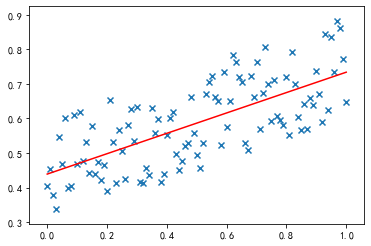

In [37]:
plt.scatter(x,y,marker="x") 
plt.plot(x,y_hat,c='r')

## 用矩阵公式

In [53]:
import numpy as np
X=np.array([1,2,3,4,5])
Y=np.array([10,12,11,14,13])
X_b=np.c_[X,np.ones((5,1))]
X_b

W_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
W_best

array([0.8, 9.6])

In [54]:
y_pred=X_b.dot(W_best)
y_pred

array([10.4, 11.2, 12. , 12.8, 13.6])

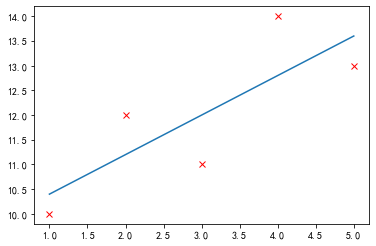

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X,Y,'rx')
plt.plot(X,y_pred)

## 用sklearn的函数包

In [56]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X.reshape(5,1),Y)

lin_reg.intercept_,lin_reg.coef_

y_hat=lin_reg.predict(X.reshape(5,1))

y_hat

array([10.4, 11.2, 12. , 12.8, 13.6])

In [57]:
best_svd,residuals,rank,s=np.linalg.lstsq(X_b,Y,rcond=1e-6)
best_svd

array([0.8, 9.6])

In [58]:
best_svd=np.linalg.pinv(X_b).dot(Y)
best_svd

array([0.8, 9.6])